<a href="https://colab.research.google.com/github/dasamitansu159/Physic-Informed-Neural-Networks/blob/main/2D_Advection_Eq_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 0, Loss: 0.4546760022640228
Epoch: 500, Loss: 0.050904206931591034
Epoch: 1000, Loss: 0.008638853207230568
Epoch: 1500, Loss: 0.0030040147248655558
Epoch: 2000, Loss: 0.0007259915000759065
Epoch: 2500, Loss: 0.000158190872753039
Epoch: 3000, Loss: 8.568727207602933e-05
Epoch: 3500, Loss: 8.556274406146258e-05
Epoch: 4000, Loss: 5.848389264428988e-05
Epoch: 4500, Loss: 5.139689892530441e-05
Epoch: 5000, Loss: 4.5916251110611483e-05
Epoch: 5500, Loss: 4.17126138927415e-05
Epoch: 6000, Loss: 3.891796950483695e-05
Epoch: 6500, Loss: 3.464563633315265e-05
Epoch: 7000, Loss: 3.229924914194271e-05
Epoch: 7500, Loss: 3.0116236303001642e-05
Epoch: 8000, Loss: 2.774734457489103e-05
Epoch: 8500, Loss: 2.6044101105071604e-05
Epoch: 9000, Loss: 2.4512779418728314e-05
Epoch: 9500, Loss: 2.3195256289909594e-05
Epoch: 10000, Loss: 2.200472226832062e-05
Epoch: 10500, Loss: 2.0905270503135398e-05
Epoch: 11000, Loss: 1.992662510019727e-05
Epoch: 11500, Loss: 1.901214272947982e-05
Epoch: 12000, Los

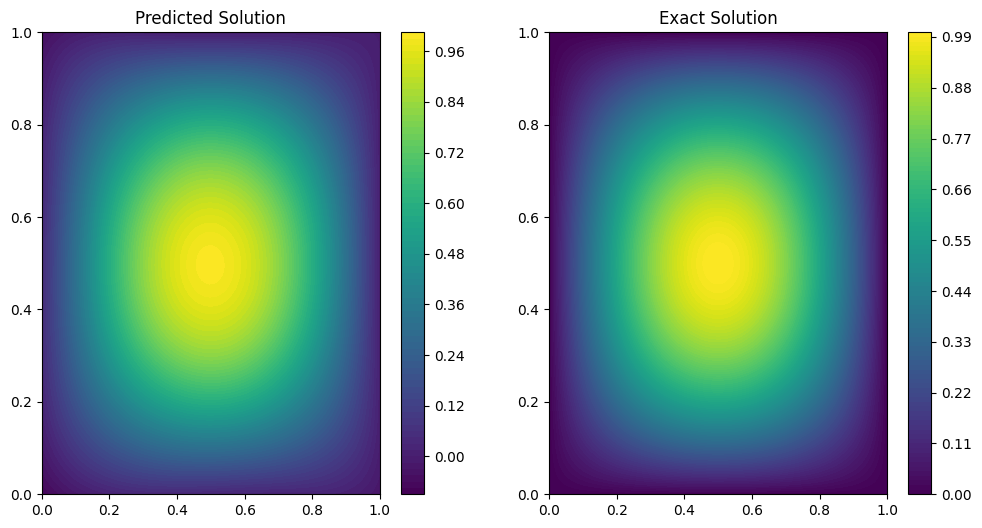

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.hidden_layer1 = nn.Linear(3, 20)
        self.hidden_layer2 = nn.Linear(20, 20)
        self.hidden_layer3 = nn.Linear(20, 20)
        self.output_layer = nn.Linear(20, 1)
        self.activation = torch.tanh

    def forward(self, x):
        x = self.activation(self.hidden_layer1(x))
        x = self.activation(self.hidden_layer2(x))
        x = self.activation(self.hidden_layer3(x))
        return self.output_layer(x)

# Define the PDE and boundary conditions
def pde(x, y, t, u, u_x, u_y, u_t, cx, cy):
    return u_t + cx * u_x + cy * u_y

# Define the exact solution
def exact_solution(x, y, t, cx, cy):
    return np.sin(np.pi * (x - cx * t)) * np.sin(np.pi * (y - cy * t))

# Generate training data
num_points = 20000
x = torch.rand((num_points, 1), requires_grad=True)
y = torch.rand((num_points, 1), requires_grad=True)
t = torch.rand((num_points, 1), requires_grad=True)

# Set advection velocities
cx = 1.0
cy = 1.0

# Initialize the PINN model
pinn = PINN()

# Define the optimizer
optimizer = optim.Adam(pinn.parameters(), lr=0.001)

# Training loop
def train_step():
    optimizer.zero_grad()

    # Concatenate inputs
    X = torch.cat([x, y, t], dim=1)

    # Predictions
    u = pinn(X)

    # Compute gradients
    u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_y = torch.autograd.grad(u, y, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_t = torch.autograd.grad(u, t, grad_outputs=torch.ones_like(u), create_graph=True)[0]

    # Compute the PDE residual
    pde_residual = pde(x, y, t, u, u_x, u_y, u_t, cx, cy)

    # Compute the data loss

    initial_condition_loss = torch.mean((u - torch.tensor(exact_solution(x.detach().numpy(), y.detach().numpy(), t.detach().numpy(), cx, cy), dtype=torch.float32))**2)


    # Compute the PDE loss
    pde_loss = torch.mean(pde_residual**2)

    #Boundary loss and initial condition loss both got managed in the data loss

    # Total loss
    loss = initial_condition_loss + pde_loss

    # Backward pass and optimize
    loss.backward()
    optimizer.step()

    return loss.item()

# Train the model
num_epochs = 20000
for epoch in range(num_epochs):
    loss = train_step()
    if epoch % 500 == 0:
        print(f'Epoch: {epoch}, Loss: {loss}')

# Generate test data for visualization
x_test = np.linspace(0, 1, 100)
y_test = np.linspace(0, 1, 100)
t_test = np.array([1.0])

X, Y = np.meshgrid(x_test, y_test)
X_flat = X.flatten()
Y_flat = Y.flatten()
T_flat = np.ones_like(X_flat) * t_test

X_test = np.vstack((X_flat, Y_flat, T_flat)).T

# Predict using the trained PINN model
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
u_pred = pinn(X_test_tensor).detach().numpy()

# Reshape the predictions
U_pred = u_pred.reshape(X.shape)

# Exact solution for comparison
U_exact = exact_solution(X, Y, t_test, cx, cy)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(X, Y, U_pred, levels=100)
plt.colorbar()
plt.title('Predicted Solution')

plt.subplot(1, 2, 2)
plt.contourf(X, Y, U_exact, levels=100)
plt.colorbar()
plt.title('Exact Solution')

plt.show()


0.005054648569131907


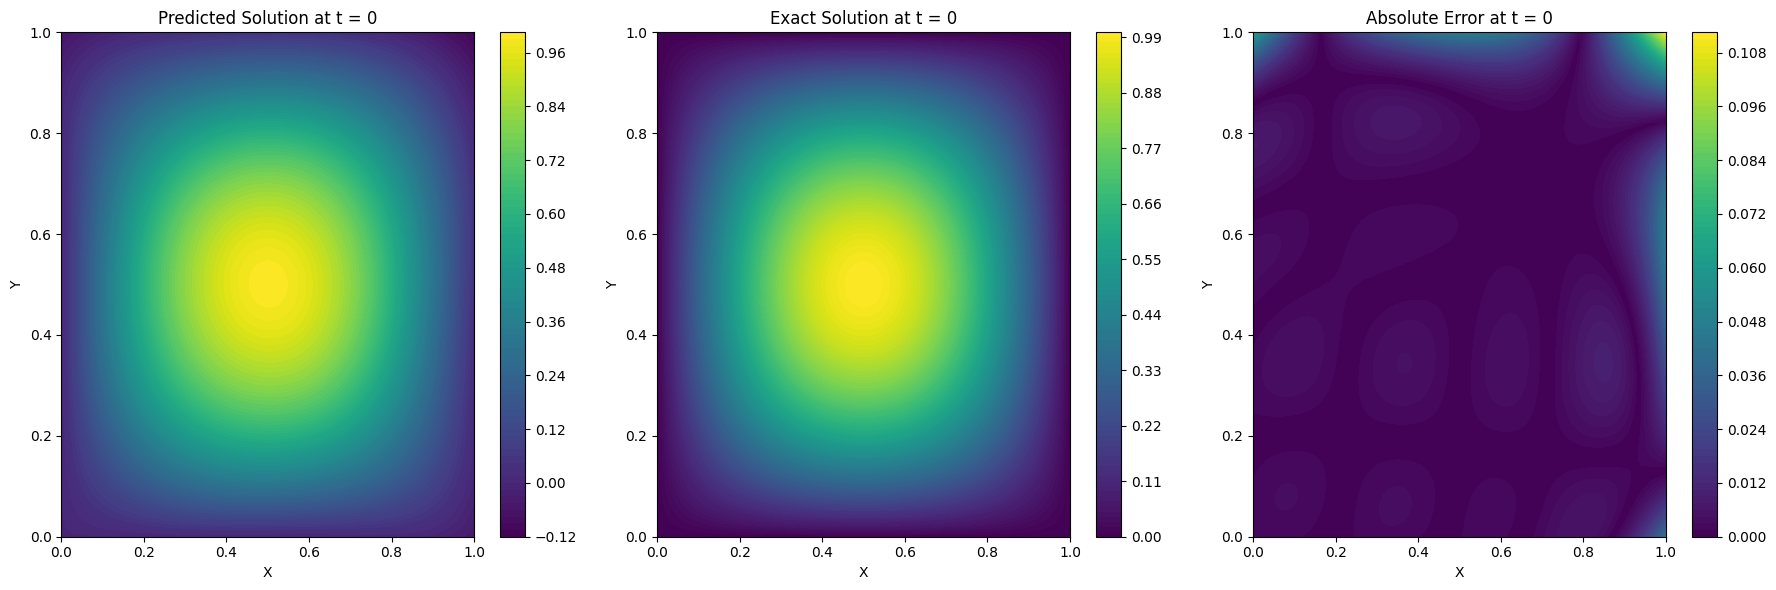

0.0018342749936640648


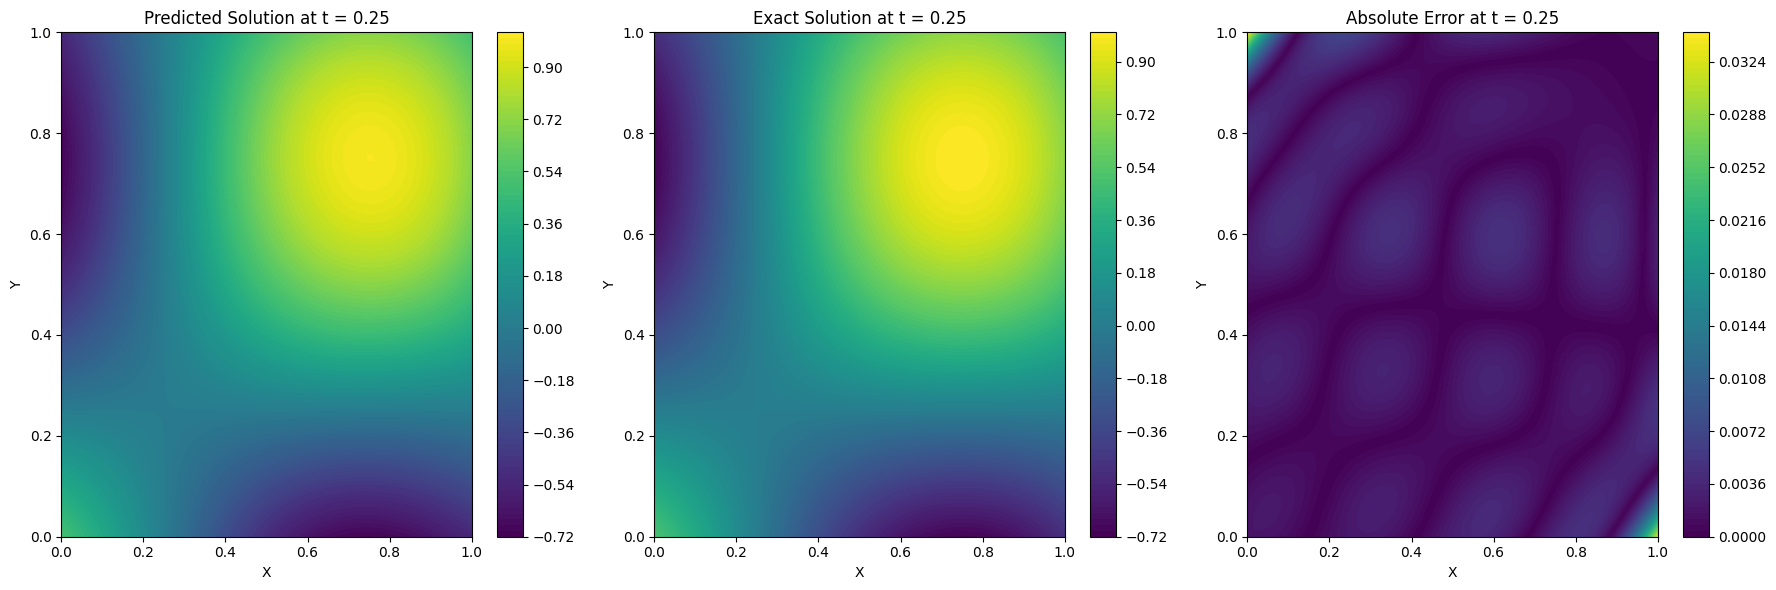

0.0019707561266559277


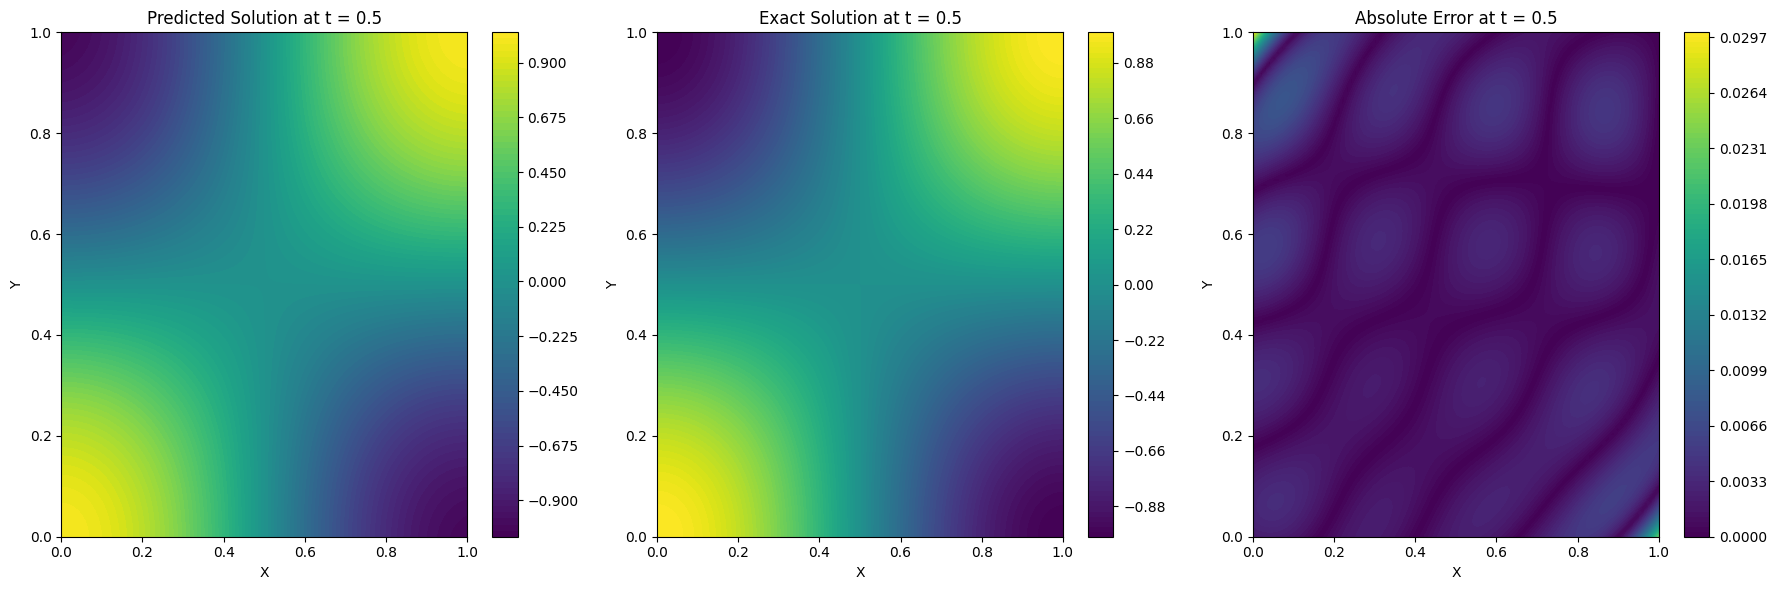

0.00189939720583557


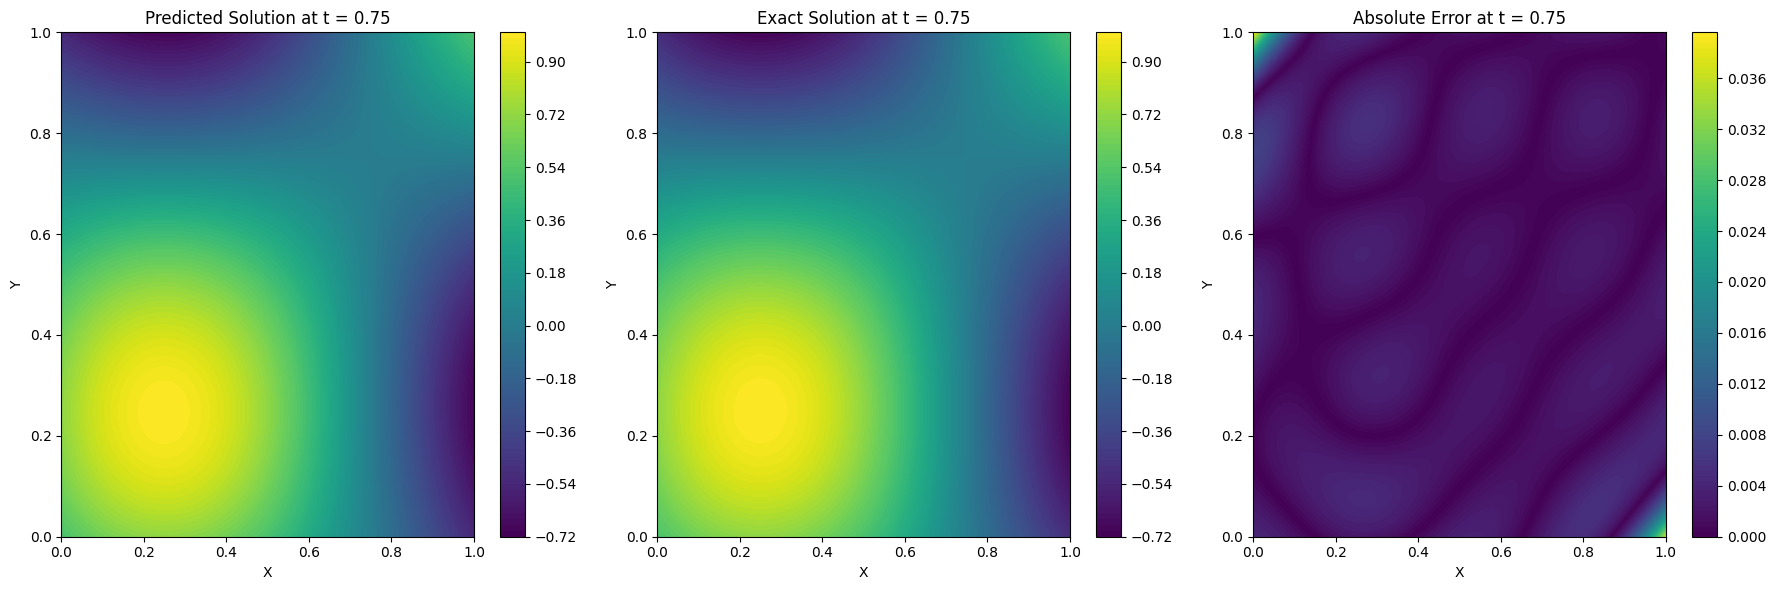

0.004045326574020647


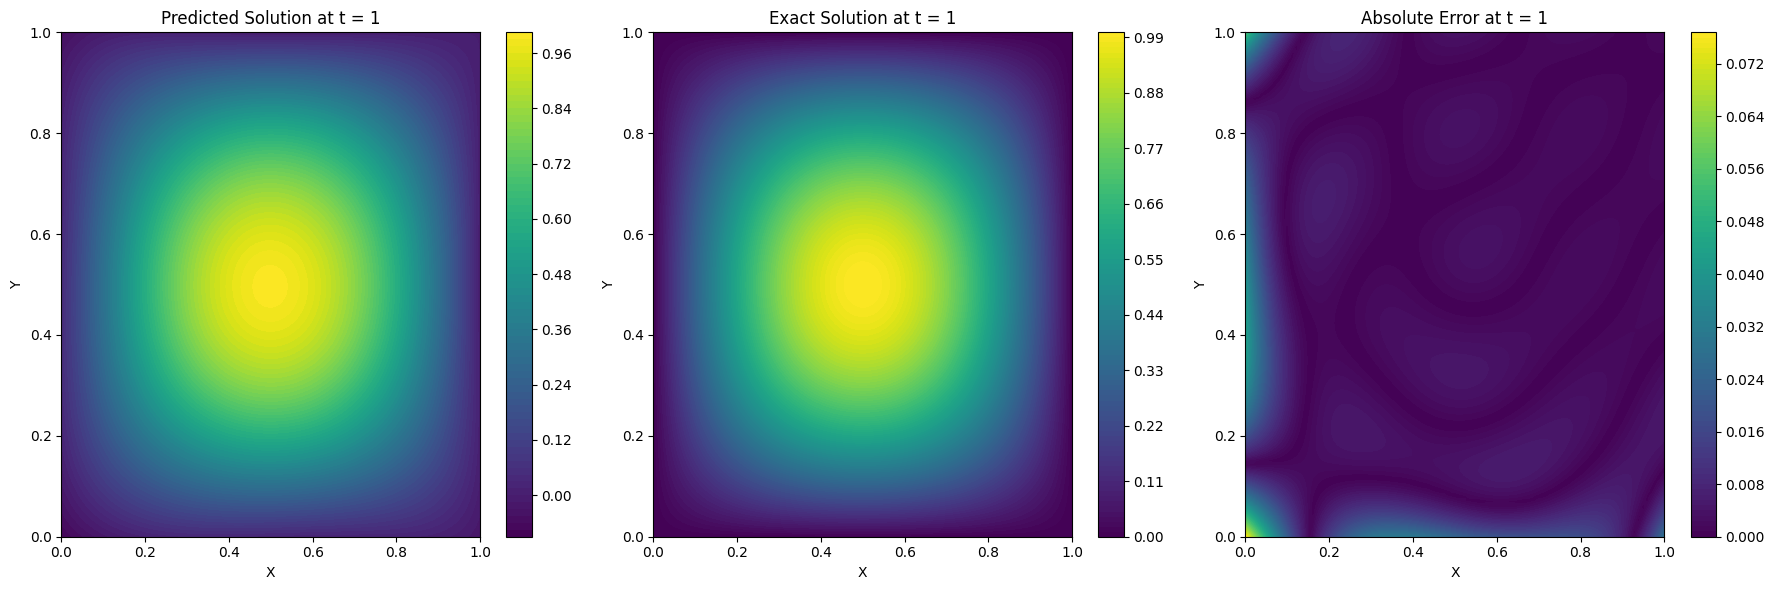

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Assuming pinn and exact_solution are defined elsewhere in your code
# pinn = ... (your trained model)
# exact_solution = ... (your exact solution function)

for t in [0, 0.25, 0.5, 0.75, 1]:
    # Generate test data for visualization
    x_test = np.linspace(0, 1, 100)
    y_test = np.linspace(0, 1, 100)
    t_test = np.array([t])

    X, Y = np.meshgrid(x_test, y_test)
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    T_flat = np.ones_like(X_flat) * t_test

    X_test = np.vstack((X_flat, Y_flat, T_flat)).T

    # Predict using the trained PINN model
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    u_pred = pinn(X_test_tensor).detach().numpy()

    # Reshape the predictions
    U_pred = u_pred.reshape(X.shape)

    # Exact solution for comparison
    U_exact = exact_solution(X, Y, t_test, cx, cy)

    # Calculate the absolute error
    absolute_error = np.abs(U_pred - U_exact)
    print(absolute_error.mean())

    # Plot the results
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.contourf(X, Y, U_pred, levels=100)
    plt.colorbar()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f'Predicted Solution at t = {t_test[0]}')

    plt.subplot(1, 3, 2)
    plt.contourf(X, Y, U_exact, levels=100)
    plt.colorbar()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f'Exact Solution at t = {t_test[0]}')

    plt.subplot(1, 3, 3)
    plt.contourf(X, Y, absolute_error, levels=100)
    plt.colorbar()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f'Absolute Error at t = {t_test[0]}')

    plt.tight_layout()
    plt.show()
